## Python - A Crash Course By Example
## Pandas Data Frames
Dr. Victor Pankratius<br>
Massachusetts Institute of Technology<br>
http://www.victorpankratius.com

<hr>

#### Pandas - working with tabular data
https://pandas.pydata.org/pandas-docs/stable/index.html <br>
https://pandas.pydata.org/pandas-docs/stable/pandas.pdf

In [1]:
#pandas data structure overview; code and examples from pandas repo/sources
#
# Series        dim: 1, labeled same-type array
# TimeSeries    dim: 1, series with datetime index
# DataFrame     dim: 2, table structure, var size / column types
# Panel         dim: 3, labeled array, var size

#*******************************************************************
# 
import pandas as pd

In [2]:
# create Series
print ( pd.Series([99,100,120.1]) )
#> 
#0     99.0
#1    100.0
#2    120.1
#dtype: float64
#Note: pandas creates default integer index

0     99.0
1    100.0
2    120.1
dtype: float64


In [3]:
dates=pd.date_range('20130101',periods=3)
print (dates)
#> DatetimeIndex([2013-01-01, ..., 2013-01-03]...
#  Length: 3, Freq: D, Timezone: None

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03'], dtype='datetime64[ns]', freq='D')


In [4]:
print (dates[2])
#> 2013-01-03 00:00:00

2013-01-03 00:00:00


In [5]:
import numpy as np
myRandArray=np.random.randn(3,3)
print (myRandArray)
#>
#[[-0.04022492 -1.48910418  0.32314919]
# [ 0.72081504 -1.28415429 -0.22712481]
# [ 0.33201108  1.88092201  0.12513505]]

[[-0.38018585 -0.32997138 -0.54527619]
 [ 0.8737399  -0.60607225  0.65851617]
 [-0.37840914  0.38771611 -0.96332527]]


In [6]:
#add / create a pandas dataframe
df = pd.DataFrame(myRandArray,index=dates,columns=list('ABC'))
print (df)
#                   A         B         C
#2013-01-01 -0.040225 -1.489104  0.323149
#2013-01-02  0.720815 -1.284154 -0.227125
#2013-01-03  0.332011  1.880922  0.125135

                   A         B         C
2013-01-01 -0.380186 -0.329971 -0.545276
2013-01-02  0.873740 -0.606072  0.658516
2013-01-03 -0.378409  0.387716 -0.963325


In [7]:
# map a function to individual elements of data frame; 
# compare with 'map' in Python tutorial 1
print (df.applymap(abs))
#                   A         B         C
#2013-01-01  0.040225  1.489104  0.323149
#2013-01-02  0.720815  1.284154  0.227125
#2013-01-03  0.332011  1.880922  0.125135

                   A         B         C
2013-01-01  0.380186  0.329971  0.545276
2013-01-02  0.873740  0.606072  0.658516
2013-01-03  0.378409  0.387716  0.963325


In [8]:
#apply sum function column-wise
print (df.apply(sum))
#A    1.012601
#B   -0.892336
#C    0.221159

A    0.115145
B   -0.548328
C   -0.850085
dtype: float64


In [9]:
#mean per column
print (df.mean())
#A    0.337534
#B   -0.297445
#C    0.073720

A    0.038382
B   -0.182776
C   -0.283362
dtype: float64


In [10]:
df2 = pd.DataFrame({'A':1.,
                    'B':pd.Timestamp('20150206'),
                    'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'
})

In [11]:
print (df2)
#>  A          B  C  D      E    F
#0  1 2015-02-06  1  3   test  foo
#1  1 2015-02-06  1  3  train  foo
#2  1 2015-02-06  1  3   test  foo
#3  1 2015-02-06  1  3  train  foo

     A          B    C  D      E    F
0  1.0 2015-02-06  1.0  3   test  foo
1  1.0 2015-02-06  1.0  3  train  foo
2  1.0 2015-02-06  1.0  3   test  foo
3  1.0 2015-02-06  1.0  3  train  foo


In [12]:
print (df['A'])   #get colum A
#2013-01-01   -0.040225
#2013-01-02    0.720815
#2013-01-03    0.332011

2013-01-01   -0.380186
2013-01-02    0.873740
2013-01-03   -0.378409
Freq: D, Name: A, dtype: float64


In [13]:
print (df[df['A']>0]) #use A's colum to select data
#                   A         B         C
#2013-01-02  0.720815 -1.284154 -0.227125
#2013-01-03  0.332011  1.880922  0.125135

                  A         B         C
2013-01-02  0.87374 -0.606072  0.658516


In [14]:
#create groups and then the sum per group
print ( df2[['C','D','E']].groupby('E').sum() )
#       C  D
#E          
#test   2  6
#train  2  6

         C  D
E            
test   2.0  6
train  2.0  6


In [15]:
print  ( df.query('A < 0 & B > 1') )
#>
#Columns: [A, B, C]
#Index: []
#

Empty DataFrame
Columns: [A, B, C]
Index: []


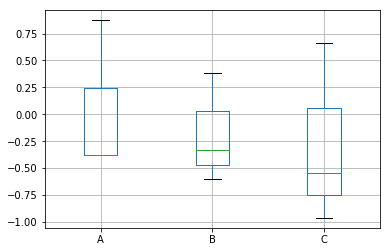

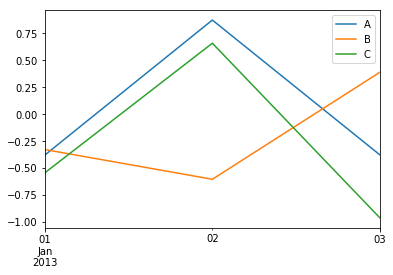

In [16]:
#create a box and whiskers plot
%matplotlib inline
df.boxplot()
df.plot()